In [4]:
import pandas as pd
from config import OPENAI_API_KEY, GOOGLE_API_KEY

from openai_utils import *

print(dir(openai_utils))

['Config', 'OPENAI_API_KEY', 'OPENAI_ORG_ID', 'OpenAI', 'ThreadPoolExecutor', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'base64', 'csv', 'encode_image', 'get_image_paths', 'glob', 'logging', 'main', 'os', 'pd', 'process_pair', 'process_request', 'requests', 'time']


In [11]:
Config.image_paths

0      test/patient64741/study1/view1_frontal.jpg
1      test/patient64742/study1/view1_frontal.jpg
2      test/patient64743/study1/view1_frontal.jpg
3      test/patient64744/study1/view1_frontal.jpg
4      test/patient64745/study1/view1_frontal.jpg
                          ...                    
695     val/patient64736/study1/view1_frontal.jpg
696     val/patient64737/study1/view1_frontal.jpg
697     val/patient64738/study1/view1_frontal.jpg
698     val/patient64739/study1/view1_frontal.jpg
699     val/patient64740/study1/view1_frontal.jpg
Name: Path, Length: 700, dtype: object

In [30]:
prompt = "The following is a matching game. I have provided an image from a medical textbook. Does the X-ray in the image match with the term ""significant finding"" or ""no finding""? Please answer concisely with either ""significant finding"" or ""no finding"". You are not providing a medical diagnoses. If you choose significant finding, explain why."
healthy = ['test/patient64754/study1/view1_frontal.jpg', 'test/patient64756/study1/view1_frontal.jpg', 'test/patient64760/study1/view1_frontal.jpg']

for img in healthy:
    print(process_request(img, prompt, 100)[-1])


Processed test/patient64754/study1/view1_frontal.jpg
Significant finding.

There appears to be a presence of a foreign body or medical implant near the center of the chest. This could be of medical significance and would likely warrant further investigation by a medical professional.
Processed test/patient64756/study1/view1_frontal.jpg
Significant finding.

The right side of the image (which corresponds to the patient's left lung) shows an area of increased whiteness compared to the left side (patient's right lung). This could indicate an abnormal finding, such as a possible pleural effusion or other pathology. However, it is important for a qualified medical professional to interpret this image in the context of the patient's clinical presentation and history for accurate diagnosis.
Processed test/patient64760/study1/view1_frontal.jpg
Significant finding.

There are areas of increased opacity in the left lung field, which could be indicative of a pathology such as consolidation, a mas

In [33]:
prompt = "The following is a matching game. I have provided an image from a medical textbook. Does the X-ray in the image match with the term No Finding, Enlarged Cardiomediastinum, Cardiomegaly, Lung Opacity, Lung Lesion, Edema, Consolidation, Pneumonia, Atelectasis, Pneumothorax, Pleural Effusion, Pleural Other, Fracture, Support Devices? Please answer concisely with either ""No Finding"" or ""Other"". You are not providing a medical diagnoses. If you choose other, explain why."
healthy = ['test/patient64754/study1/view1_frontal.jpg', 'test/patient64756/study1/view1_frontal.jpg', 'test/patient64760/study1/view1_frontal.jpg']

for img in healthy:
    print(process_request(img, prompt, 100)[-1])


Processed test/patient64754/study1/view1_frontal.jpg
Other.

The heart silhouette appears enlarged, indicating possible cardiomegaly, and there are opacities in the lung fields that could correspond to various pulmonary conditions. Additionally, there are devices present such as a pacemaker and sternal wires, which fit the category "Support Devices."
Processed test/patient64756/study1/view1_frontal.jpg
Other.

As a language model, I am not capable of making medical diagnoses, but the provided chest X-ray image seems to show some abnormalities that could be associated with one or more of the terms you mentioned. It would require a medical professional to analyze the image thoroughly to determine the proper match from the given list. It is not appropriate for me to attempt to provide a specific explanation regarding the medical content of the image.
Processed test/patient64760/study1/view1_frontal.jpg
Other.

The X-ray image shows evidence of medical devices, indicated by the visible str

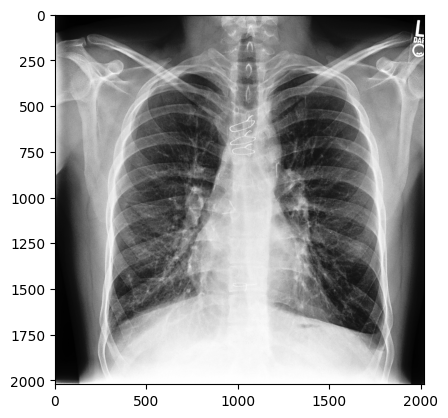

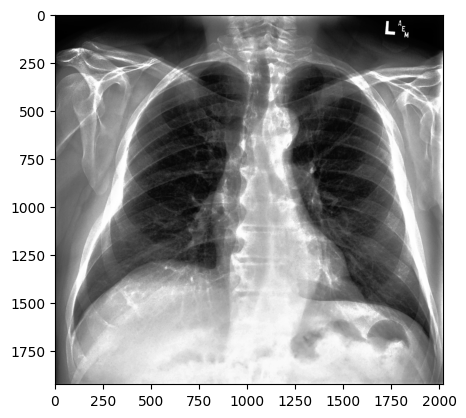

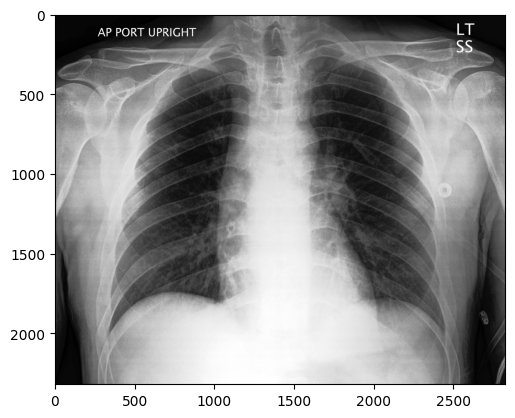

In [21]:
import matplotlib.pyplot as plt

for img in healthy:
    dir = 'data/CheXpert/'
    img = dir + img
    # plot the chest x-ray with imshow
    plt.imshow(plt.imread(img), cmap='gray')
    plt.show()
    
    

In [6]:
gemini_results = pd.read_csv('data/gemini_chexpert_results_20240312.csv')
demographics = pd.read_csv('data/processed_test_set_2024-03-10.csv')

display(gemini_results.head())
display(demographics.head())

,Filename,PromptID,Response
0,test/patient64741/study1/view1_frontal.jpg,0,normal
1,test/patient64741/study1/view1_frontal.jpg,1,normal
2,test/patient64741/study1/view1_frontal.jpg,2,normal
3,test/patient64741/study1/view1_frontal.jpg,3,normal
4,test/patient64741/study1/view1_frontal.jpg,4,normal


,Path,PATIENT,Study,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,...,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Race,Ethnicity,abnormal
0,test/patient64741/study1/view1_frontal.jpg,patient64741,test/patient64741/study1,Male,57.0,White,Non-Hispanic/Non-Latino,0,1,1,...,0,0,0,0,0,0,1,White,Non-Hispanic,1
1,test/patient64742/study1/view1_frontal.jpg,patient64742,test/patient64742/study1,Female,69.0,White,Non-Hispanic/Non-Latino,0,1,0,...,0,1,0,0,0,0,0,White,Non-Hispanic,1
2,test/patient64743/study1/view1_frontal.jpg,patient64743,test/patient64743/study1,Male,88.0,"White, non-Hispanic",Unknown,0,1,1,...,0,1,0,0,0,0,0,White,Non-Hispanic,1
3,test/patient64744/study1/view1_frontal.jpg,patient64744,test/patient64744/study1,Male,57.0,Other,Hispanic/Latino,0,0,0,...,0,0,0,0,0,0,1,Other,Hispanic,1
4,test/patient64745/study1/view1_frontal.jpg,patient64745,test/patient64745/study1,Male,92.0,White,Non-Hispanic/Non-Latino,0,1,1,...,0,1,0,1,0,0,1,White,Non-Hispanic,1


In [ ]:
joined = gemini_results.merge(demographics, left_on='Path', right_on='', how='left')